In [1]:
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime(2017, 1, 27)

##data source https://fred.stlouisfed.org/series/SFXRSA
hp = web.DataReader("SFXRSA", "fred", start, end)

In [2]:
hp.head()

,SFXRSA
DATE,
1987-01-01,46.96
1987-02-01,47.30
1987-03-01,47.84
1987-04-01,47.98
1987-05-01,48.31


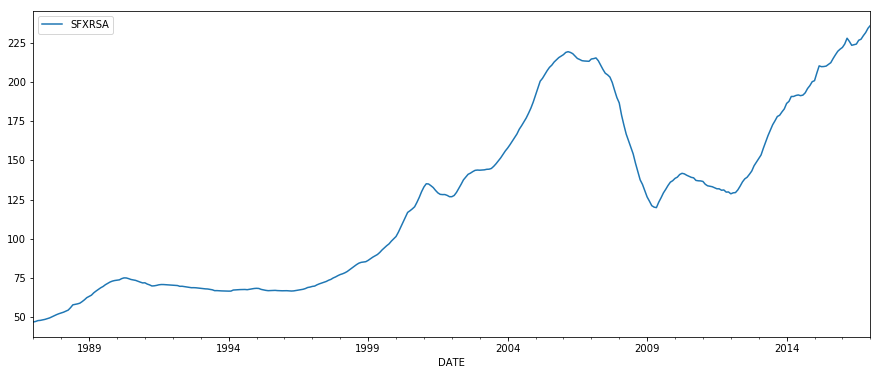

In [3]:
hp.plot(figsize=(15, 6))
plt.show()

Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in Case-Shiller Index series

Augmented Dickey-Fuller test

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be accepted or rejected. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [4]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [5]:
model = ARIMA(hp, order=(5,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals

                             ARIMA Model Results                              
Dep. Variable:               D.SFXRSA   No. Observations:                  360
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -460.701
Method:                       css-mle   S.D. of innovations              0.868
Date:                Mon, 01 May 2017   AIC                            935.402
Time:                        22:04:01   BIC                            962.605
Sample:                    02-01-1987   HQIC                           946.219
                         - 01-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5619      0.417      1.348      0.178      -0.255       1.379
ar.L1.D.SFXRSA     0.7503      0.053     14.283      0.000       0.647       0.853
ar.L2.D.SFXRSA     0.1500      0.065

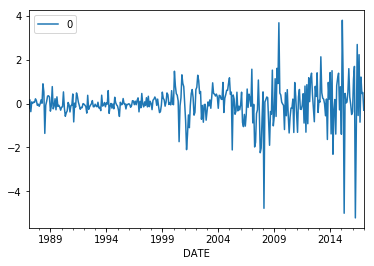

In [6]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals

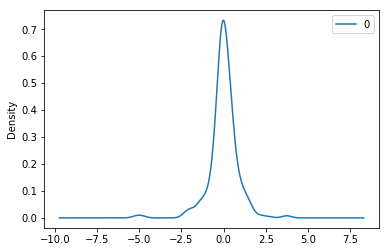

                0
count  360.000000
mean     0.000718
std      0.869476
min     -5.218799
25%     -0.264935
50%     -0.019094
75%      0.374423
max      3.797602


In [7]:
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

C:\Users\alexb\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
C:\Users\alexb\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


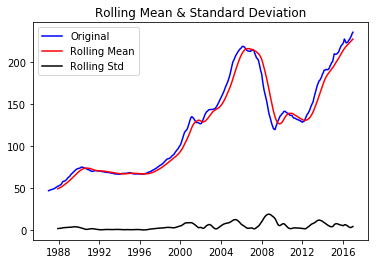

In [9]:
test_stationarity(hp)

In [10]:
sm.stats.durbin_watson(hp)

array([ 0.00018377])

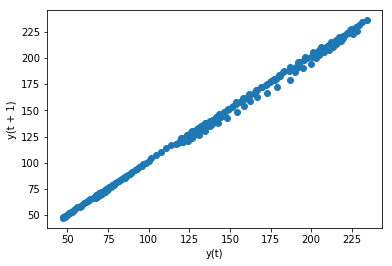

In [11]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
lag_plot(hp)
pyplot.show()

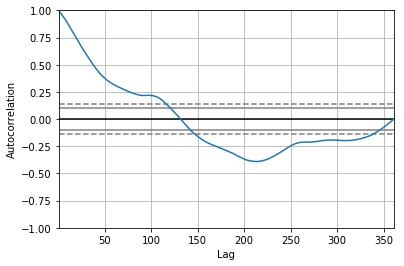

In [12]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(hp)
pyplot.show()

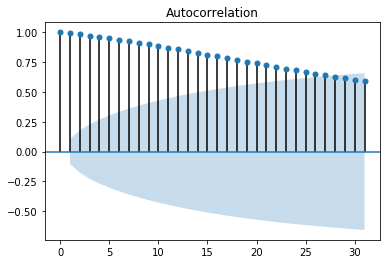

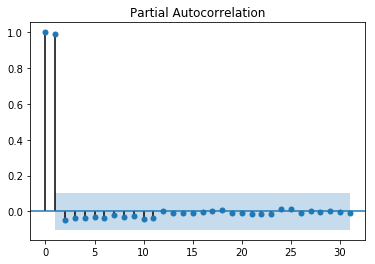

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(hp, lags=31)
plot_pacf(hp,lags=31)
pyplot.show()

In [14]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

                             ARIMA Model Results                              
Dep. Variable:               D.SFXRSA   No. Observations:                  360
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -460.701
Method:                       css-mle   S.D. of innovations              0.868
Date:                Mon, 01 May 2017   AIC                            935.402
Time:                        22:04:03   BIC                            962.605
Sample:                    02-01-1987   HQIC                           946.219
                         - 01-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5619      0.417      1.348      0.178      -0.255       1.379
ar.L1.D.SFXRSA     0.7503      0.053     14.283      0.000       0.647       0.853
ar.L2.D.SFXRSA     0.1500      0.065

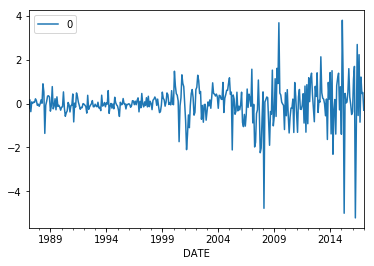

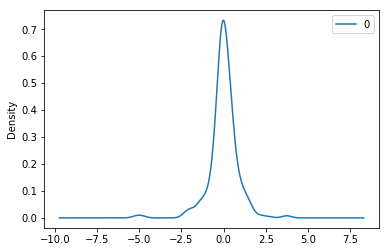

                0
count  360.000000
mean     0.000718
std      0.869476
min     -5.218799
25%     -0.264935
50%     -0.019094
75%      0.374423
max      3.797602


In [15]:
# fit model
model = ARIMA(hp, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [16]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
X = hp.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=213.211491, expected=213.270000
predicted=213.354364, expected=213.170000
predicted=213.096179, expected=214.620000
predicted=216.167016, expected=214.880000
predicted=215.332928, expected=215.320000
predicted=215.449896, expected=213.530000
predicted=211.936520, expected=210.780000
predicted=207.854045, expected=207.970000
predicted=205.580634, expected=205.560000
predicted=203.784203, expected=204.520000
predicted=203.997431, expected=203.100000
predicted=202.042623, expected=199.650000
predicted=195.926727, expected=194.700000
predicted=189.513444, expected=190.010000
predicted=185.948705, expected=186.640000
predicted=184.263563, expected=178.850000
predicted=171.087151, expected=172.560000
predicted=165.958031, expected=166.750000
predicted=161.843969, expected=162.560000
predicted=158.455616, expected=158.500000
predicted=154.790900, expected=154.100000
predicted=149.707621, expected=148.160000
predicted=142.360050, expected=142.820000
predicted=137.687946, expected=137

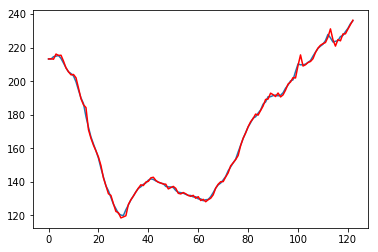

In [18]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [19]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [20]:
# plot residual errors for ARIMA model
from pandas import Series
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from matplotlib import pyplot

In [21]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = hp
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf
